In [99]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
from IPython.display import Image

In [100]:
sp.init_printing()
x, y, tau, g = sp.symbols('x y tau g')
u = sp.Function('u')(y)

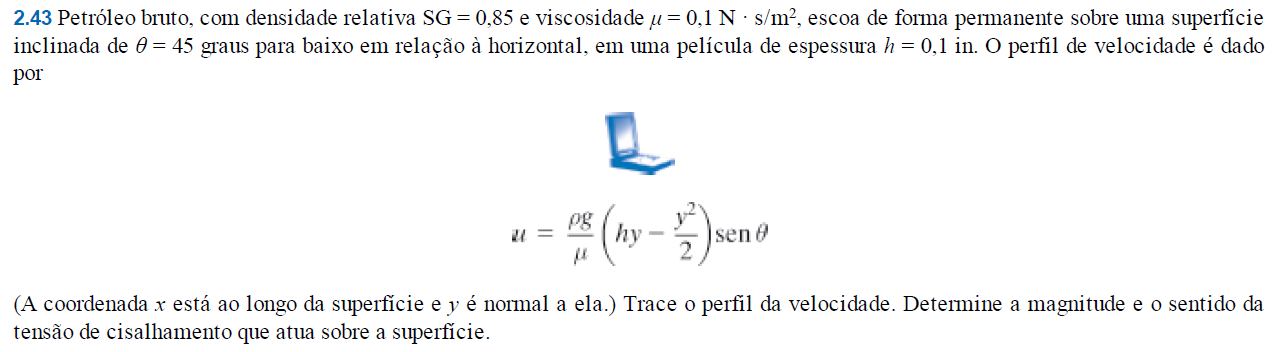

In [101]:
Image(filename='quest2.43.png')

Dados Utilizados:

In [102]:
SG = 0.85           # Gravidade Específica
mi = 0.1            # [N.s/m²] viscosidade dinâmica
theta = 45          # [degrees]
h = 0.1 * 0.0254    # [m] polegada convetida para metros
rho_petroleo = 1    # [kg/N] peso específico do petróleo
g = 9.81            # [m/s²] gravidade

HIPÓTESES SIMPLIFICADORAS:
1. Regime Permanente
2. Fluido Newtoniano (petróleo bruto é newtoniano??)

In [103]:
theta_r = math.radians(theta)

In [104]:
r = (rho_petroleo * g / mi) * (h * y - (y ** 2) / 2) * np.sin(theta_r)
sp.Eq(u, r)

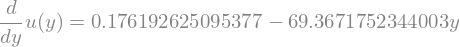

In [105]:
dubydy = sp.simplify(sp.Derivative(r, y))
sp.Eq(sp.diff(u), dubydy)

In [106]:
eq = sp.Eq(tau, mi * dubydy)
eq

In [107]:
t1 = np.arange(0, 0.1, 0.01)
values = []
for i in t1:
    item = sp.solve(eq.subs(y, i))
    values.append(item[0])

[0.0176192625095377, -0.0517479127248626, -0.121115087959263, -0.190482263193663, -0.259849438428064, -0.329216613662464, -0.398583788896864, -0.467950964131265, -0.537318139365665, -0.606685314600065]


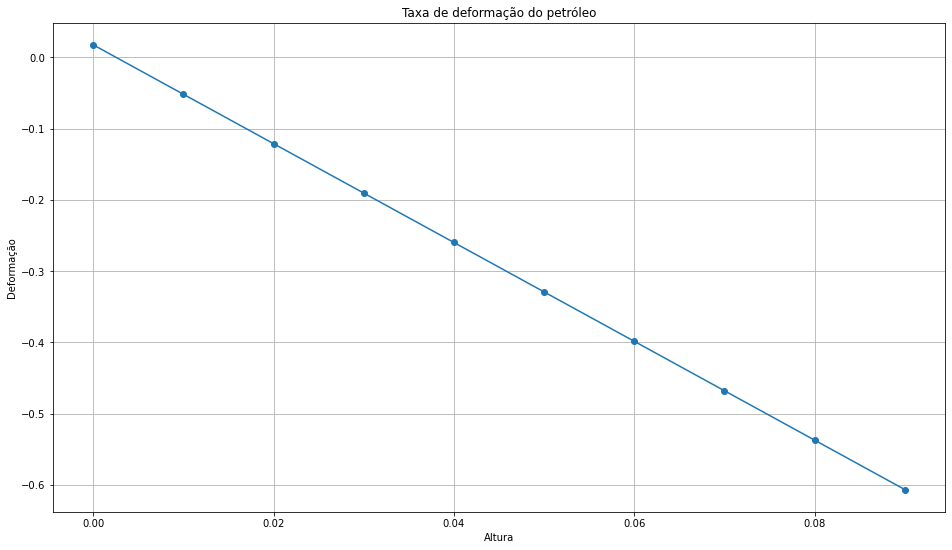

In [110]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(t1, values, '-o')
ax.set_xlabel('Altura')
ax.set_ylabel('Deformação')
ax.set_title('Taxa de deformação do petróleo')
plt.grid(True)
plt.show()

Fazer a revisão desses cálculos acima depois